In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
import sympy as sp
import scipy as sy
from scipy.integrate import odeint

In [2]:
phi,V0,lam_sym = sp.symbols('phi V0 lam',real =True)


V=V0*(1-sp.exp(-sp.sqrt(2/3)*phi))**2
dVdphi = sp.diff(V,phi)
d2Vdphi2 = sp.diff(V,phi,2)
lam = -1/V *dVdphi
gam = (d2Vdphi2*V)/(dVdphi**2)

lam_simplified = sp.simplify(lam)
print("lam(phi) =", lam_simplified)

# Substitute phi(lambda)
phi_of_lam = sp.sqrt(3/2) * sp.log(1 + 2*sp.sqrt(2/3)/lam_sym)
gam_of_lam = gam.subs(phi, phi_of_lam)
gam_of_lam_simplified = sp.simplify(gam_of_lam)
print(rf"gamma(lam) =", gam_of_lam_simplified)

#test = gam_of_lam_simplified.subs(lam_sym,5)
#print(test)

lam(phi) = 1.63299316185545/(1 - exp(0.816496580927726*phi))
gamma(lam) = 1.0 - 0.5*((lam + 1.63299316185545)/lam)**1.0


<>:6: SyntaxWarning: invalid escape sequence '\p'
<>:6: SyntaxWarning: invalid escape sequence '\p'
/tmp/ipykernel_2030/1652279173.py:6: SyntaxWarning: invalid escape sequence '\p'
  plt.title('Starobinsky potential $V(\phi)$ vs scalar field $\phi$')


Text(0.5, 1.0, 'Starobinsky potential $V(\\phi)$ vs scalar field $\\phi$')

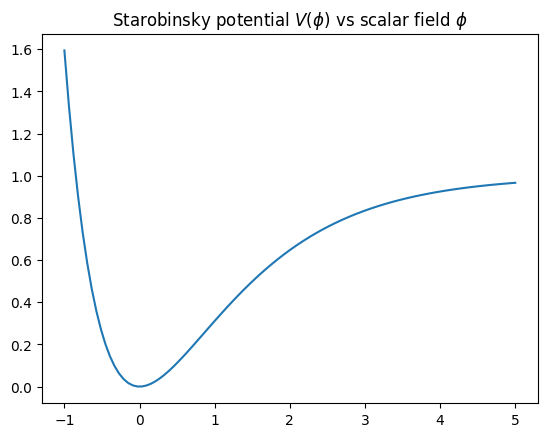

In [3]:
#Starobinsky potential model
phi = np.linspace(-1,5,100)
V_0= 1
V=V_0*(1-np.exp(-((2/3)**0.5)*phi))**2
plt.plot(phi,V)
plt.title('Starobinsky potential $V(\phi)$ vs scalar field $\phi$')

<>:29: SyntaxWarning: invalid escape sequence '\o'
<>:29: SyntaxWarning: invalid escape sequence '\o'
/tmp/ipykernel_2030/2434891253.py:29: SyntaxWarning: invalid escape sequence '\o'
  plt.plot(N_span, w, label='$\omega_\phi$')


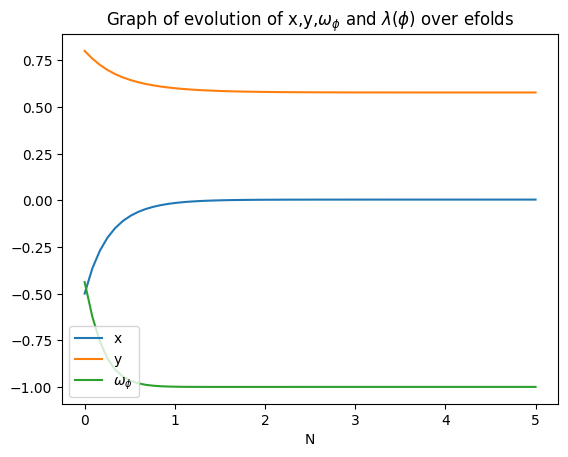

In [4]:
wb = -1/3  # dust

def Gamma(lam):
    return 1.0 - 0.5*((lam + (2/3)**0.5)/lam)**1.0  #1.0 - 0.5*((lam + 1.63299316185545)/lam)
                                             #1-0.5*((lam+2*np.sqrt(2/3))/lam)
def system(X,N):
    x, y, lam = X
    dx = (-3*x+ np.sqrt(3/2)*lam*y**2+1.5*x*((1-wb)*(x**2-y**2)+(1+wb)*(1-x**2-y**2)))  #shows how the kinetic energy density fraction grows over e folds
    dy = (-np.sqrt(3/2)*x*y*lam+ 1.5*y*((1-wb)*(x**2-y**2)+(1+wb)*(1-x**2-y**2)))  #shows how the potential energy density fraction grows over e folds
    dlam = -np.sqrt(6)*x*lam**2*(Gamma(lam)-1)  #shows the potnetial gradient change over e folds
    return [dx, dy, dlam]

# Initial conditions
X0 = [-0.5,0.8,0.03]  #initial conditions for inflation, at inflation x<<y and y approaches 1, potential dominated.
N_span = np.linspace(0, 5, 60)# inflation lasted approx 60 efolds
#   early time inflation slow roll [0.01, 0.99, 0.01-1], wb=0, N=0-5
#   early time post inflation radiation dom time [0.05, 0.95, 1-3], wb=1/3, N=0-5
#   late time tracking [0.1, 0.1, 1-5], wb=0, N=0-60 or 100
#   late time tracking and scaling and DE [0.01, 0.01, 0.5] lambda dominated universe, wb = -1, N=0-60 or 100

sol = odeint(system, X0, N_span)
x = sol[:,0]
y = sol[:,1]
lam = sol[:,2]
w = (x**2 - y**2) / ((x**2 + y**2)+1e-18) #to avoid exploding to infinity, signals a singularity
plt.plot(N_span,x, label='x')
plt.plot(N_span, y, label='y')
#plt.plot(N_span, lam, label='$\lambda$')
plt.plot(N_span, w, label='$\omega_\phi$')
plt.title(rf"Graph of evolution of x,y,$\omega_\phi$ and $\lambda(\phi)$ over efolds")
plt.legend()
plt.xlabel("N")
plt.show()


In [ ]:
#  generating dynamical system phase portraits
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import sympy as sp

# define constants
wb = 0 #  to show inflationary era, wb=0 as scalar dominated so wb is irrelevant, for radiation era w=1/3, for matter era with dust w=0 and at late time scalar dominated w=0
lam_0 = 0.05 #arbitrary gradient of potential CHANGING THIS YIELDS A DIFFERENT VECTOR FIELD
# for a standard starobinsky model, 0.01<lambda<0.3 is a good range as is the potential slope. if lambda<<1 inflationary model, as lambda approaches 1, exits from inflation
# lambda = 1 transition phase, =1/3 slow roll, =0.05 quasi DeSitter appraoching


def Gamma(lam):
    lam = max(lam, 1e-6)
    return 1-0.5*((lam+2*np.sqrt(2/3))/lam)  #1.0 - 0.5*((lam + 1.63299316185545)/lam)
                                             #1-0.5*((lam+2*np.sqrt(2/3))/lam)
def dynamicsStateSpace(x,y,lam):
    #x, y, lam = X
    lam = max(lam, 1e-6)# avoids runaway lambda when kinetic energy domination goes to -
    dx = (-3*x+ np.sqrt(3/2)*lam*y**2+1.5*x*((1-wb)*(x**2-y**2)+(1+wb)*(1-x**2-y**2)))  #shows how the kinetic energy density fraction grows over e folds
    dy = (-np.sqrt(3/2)*x*y*lam+ 1.5*y*((1-wb)*(x**2-y**2)+(1+wb)*(1-x**2-y**2)))  #shows how the potential energy density fraction grows over e folds
    dlam = -np.sqrt(6)*x*lam**2*(Gamma(lam)-1)  #shows the potnetial gradient change over e folds
    return [dx, dy, dlam]

def dynamics_odeint(X,N):
  x,y,lam = X
  dx,dy,dlam = dynamicsStateSpace(x,y,lam)
  return [dx,dy,dlam]

# plot the dynamics on the same graph
initialState=np.array([-0.5,0.8,lam_0])# CHANGING THESE YIELDS A DIFFERENT TRAJECTORY. choose suitable starting position
# do several graphs with varying ICs, for inflationary model [0.01,0.99] gives potential dominated era and DeSitter asymptote (slow roll initial conditions).
# For a kinetic dominated start, ie a fast roll inflation leading to a slow roll as potential increases [0.8,0.6] adheres to the friedmann constraints.
simulationTime=np.linspace(0,5,60)#  number of e folds of time, inflation lasted 50-60
# generate the state-space trajectory
solutionState=odeint(dynamics_odeint,initialState,simulationTime,rtol=1e-10,atol=1e-10,mxstep=500)

x_vals = solutionState[:,0]
y_vals = solutionState[:,1]
lam_vals = solutionState[:,2]
w_phi = ((solutionState[:,0])**2-(solutionState[:,1])**2)/((solutionState[:,0])**2+(solutionState[:,1])**2)

plt.plot(simulationTime,w_phi)
plt.ylabel(rf'$\omega_\phi$')
plt.xlabel('Simulation time e folds')
plt.show()

plt.plot(simulationTime,lam_vals)
plt.ylabel('lam_vals')
plt.xlabel('Simulation time e folds')
plt.show()

#plotting phase portrait at lambda slice
def phase_plot_at_lam(lam_index):
  lam_slice = lam_vals[lam_index]
  print(rf"Plot of phase portrait xy at $\lambda$={lam_slice:.4f}")

  # defining a grid of points at which we create/compute tangent arrows
  x0 = np.linspace(-1.5,1.5,100)
  x1 = np.linspace(-1.5,1.5,100)
  X0,X1 = np.meshgrid(x0,x1)
  dX0 = np.zeros(X0.shape)
  dX1 = np.zeros(X1.shape)

  for i in range(X0.shape[0]):
      for j in range(X0.shape[1]):
          if X0[i,j]**2 + X1[i,j]**2 <= 1.0:
              dx,dy,_= dynamicsStateSpace(X0[i,j], X1[i,j], lam_slice)
              dX0[i,j] = dx
              dX1[i,j] = dy
          else:
              dX0[i,j] = np.nan
              dX1[i,j] = np.nan

  x_FP, y_FP, = sp.symbols('x y', real=True)

  f = (-3*x_FP+ sp.sqrt(3/2)*lam_slice*y_FP**2+ 1.5*x_FP*((1-wb)*(x_FP**2-y_FP**2) + (1+wb)*(1-x_FP**2-y_FP**2)))
  g = (-sp.sqrt(3/2)*lam_slice*x_FP*y_FP + 1.5*y_FP*((1-wb)*(x_FP**2-y_FP**2)+ (1+wb)*(1-x_FP**2-y_FP**2)))
  h = -sp.sqrt(6)*x_FP*lam_slice**2*(Gamma(lam_slice) - 1)
  J_sym = sp.Matrix([f, g]).jacobian([x_FP, y_FP]) # Symbolic Jacobian

  solutions = sp.solve([f, g], [x_FP, y_FP], dict=True)
  FP=[]
  for sol in solutions:
    x_val = sol[x_FP]
    y_val = sol[y_FP]
    #lam_val = sol[lam_FP]
    if x_val.is_real and y_val.is_real:
        x_val,y_val = float(x_val),float(y_val)
        if abs(x_val)<=1.5 and abs(y_val)<=1.5:
          FP.append([float(x_val),float(y_val)])
  #FP=np.array(FP)
  print("Physical fixed points:", FP)

  plt.figure(figsize=(8,8))
  plt.streamplot(X0, X1, dX0, dX1, density=1.2, linewidth=0.8)
  plt.plot(x_vals, y_vals, 'r', lw=2, label='Trajectory')
  plt.plot(x_vals[0], y_vals[0], 'ro', label='Initial condition')

# eternal acc is w_phi<-1/3 leads to y=+-root(2) x
  xs = np.linspace(-1.5, 1.5,100)
  ys = np.sqrt(2)*np.abs(xs)
  plt.plot(xs,ys,'--',lw=1)
  plt.fill_between(xs, ys, 1.5, alpha=0.3,label="Eternal acceleration condition barrier, $w_\phi < -1/3$")


  def classify_FP(eigvals,temp=1e-10):
    Real = np.real(eigvals)
    Imag = np.imag(eigvals)
    if np.all(Real<-temp):
      stability = 'Attractor'
    elif np.all(Real>temp):
      stability = 'Repeller'
    elif np.any(Real<-temp) and np.any(Real > temp):
      stability = 'saddle'
    elif np.all(np.abs(Real) < temp):
      stability = 'Centre'
    else:
      stability = 'NaN'
    if np.any(np.abs(Imag)>temp):
      point_type = 'Spiral'
    else:
      point_type = 'node'

    return stability,point_type

  for fp in FP:
    x_c, y_c = fp
    J_num = np.array(J_sym.subs({x_FP:x_c,y_FP:y_c}),dtype=float)
    eigvals = np.linalg.eigvals(J_num)
    stability,point_type = classify_FP(eigvals)
    print(f'Fixed points ({x_c:},{y_c})')
    print('Eigen Values:',eigvals)
    print(f'Type={point_type}')
    print(f'Stability={stability}\n')
    plt.plot(x_c, y_c, 'k*', markersize=12)
    plt.text(x_c+0.02, y_c+0.02, f"{point_type}\n{stability}", fontsize=5)
    
    
  plt.xlabel(r"$x$")
  plt.ylabel(r"$y$")
  plt.title(rf"Phase portrait at $\lambda={lam_slice:.3f}$, $\omega_b={wb}$")
  plt.xlim(-1.5,1.5)
  plt.ylim(-1.5,1.5)
  plt.legend()
  plt.show()





slice_no = 3
index = np.linspace(0,len(lam_vals)-1,slice_no).astype(int)#forces integer
for i in range(slice_no):
   temp = int(index[i])
   phase_plot_at_lam(temp)


# https://aleksandarhaber.com/phase-portraits-of-state-space-models-and-differential-equations-in-python/, https://www.youtube.com/watch?v=DeeoiE22bZ8, method from https://iopscience.iop.org/article/10.1088/1475-7516/2018/01/018/meta


Physical fixed points: [[ 0.          0.        ]
 [ 0.08097041 -0.80905158]
 [ 0.08097041  0.80905158]]
Fixed points (0.0,0.0)
Eigen Values: [-1.  2.]
Type=node
Stability=NaN

Fixed points (0.08097041401969578,-0.8090515769018183)
Eigen Values: [-3.08590453 -3.82484418]
Type=node
Stability=Attractor

Fixed points (0.08097041401969578,0.8090515769018183)
Eigen Values: [-3.08590453 -3.82484418]
Type=node
Stability=Attractor



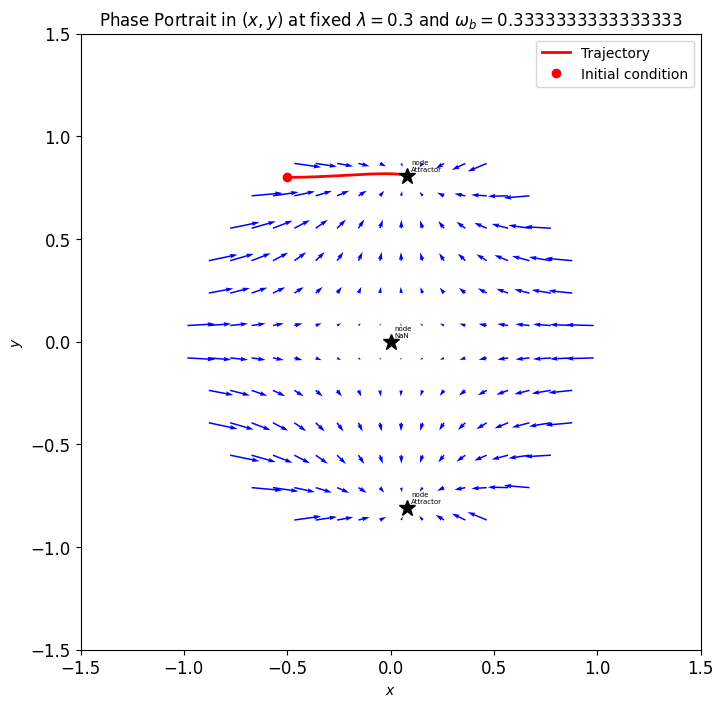

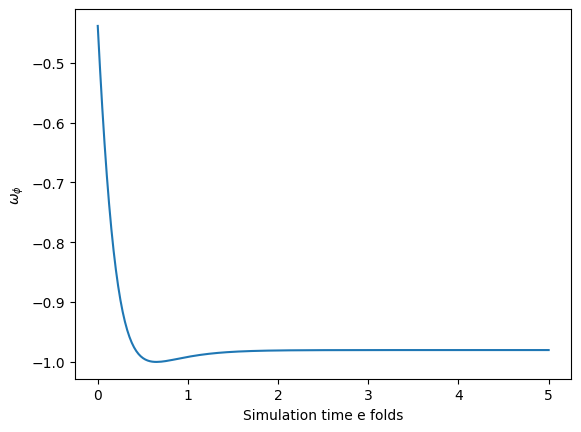

In [1]:
#  generating dynamical system phase portraits
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import sympy as sp

#dx = (-3*x + np.sqrt(3/2)*lam*y**2 + 1.5*x*((1-wb)*(x**2-y**2) + (1+wb)*(1-x**2-y**2)))
#dy = (-np.sqrt(3/2)*x*y*lam + 1.5*y*((1-wb)*(x**2-y**2) + (1+wb)*(1-x**2-y**2)))
#dlam = -np.sqrt(6)*x*lam**2*(Gamma(lam)-1)

# define constants
wb = 1/3 #  to show inflationary era, wb=0 as scalar dominated so wb is irrelevant, for radiation era w=1/3, for matter era with dust w=0 and at late time scalar dominated w=0
lam_fixed = 0.3 #arbitrary gradient of potential CHANGING THIS YIELDS A DIFFERENT VECTOR FIELD
# for a standard starobinsky model, 0.01<lambda<0.3 is a good range as is the potential slope. if lambda<<1 inflationary model, as lambda approaches 1, exits from inflation
# lambda = 1 transition phase, =1/3 slow roll, =0.05 quasi DeSitter appraoching


def Gamma(lam):
    return 1 + 0.5*(1 - 2/lam**2)

def dynamicsStateSpace(x,y,lam):
  dXdt = [(-3*x + np.sqrt(3/2)*lam*y**2 + 1.5*x*((1-wb)*(x**2-y**2) + (1+wb)*(1-x**2-y**2))),
   (-np.sqrt(3/2)*x*y*lam + 1.5*y*((1-wb)*(x**2-y**2) + (1+wb)*(1-x**2-y**2))),
    -np.sqrt(6)*x*lam**2*(Gamma(lam) - 1)]

  return [dXdt[0],dXdt[1],dXdt[2]]

# defining a grid of points at which we create/compute tangent arrows
x0 = np.linspace(-1.5,1.5,30)
x1 = np.linspace(-1.5,1.5,20)
X0,X1 = np.meshgrid(x0,x1)
dX0 = np.zeros(X0.shape)
dX1 = np.zeros(X1.shape)
#shape1,shape2 = X1.shape

for i in range(X0.shape[0]):
    for j in range(X0.shape[1]):
        if X0[i,j]**2 + X1[i,j]**2 <= 1.0:
            dXdtAtX = dynamicsStateSpace(X0[i,j], X1[i,j], lam_fixed)
            dX0[i,j] = dXdtAtX[0]
            dX1[i,j] = dXdtAtX[1]
        else:
            dX0[i,j] = np.nan
            dX1[i,j] = np.nan

x_FP, y_FP = sp.symbols('x y', real=True)

f = (-3*x_FP+ sp.sqrt(3/2)*lam_fixed*y_FP**2+ 1.5*x_FP*((1-wb)*(x_FP**2-y_FP**2) + (1+wb)*(1-x_FP**2-y_FP**2)))

g = (-sp.sqrt(3/2)*lam_fixed*x_FP*y_FP + 1.5*y_FP*((1-wb)*(x_FP**2-y_FP**2)+ (1+wb)*(1-x_FP**2-y_FP**2)))

h = -sp.sqrt(6)*x_FP*lam_fixed**2*(Gamma(lam_fixed) - 1)

J_sym = sp.Matrix([f, g]).jacobian([x_FP, y_FP]) # Symbolic Jacobian

solutions = sp.solve([f, g], [x_FP, y_FP], dict=True)
FP=[]
for sol in solutions:
  x_val = sol[x_FP]
  y_val = sol[y_FP]
  #lam_val = sol[lam_FP]
  if x_val.is_real and y_val.is_real:
      FP.append([float(x_val.evalf()),float(y_val.evalf())])
FP=np.array(FP)
print("Physical fixed points:", FP)



def dynamics_odeint(X,N):
  x,y,lam = X
  lam=lam_fixed
  dx,dy,dlam = dynamicsStateSpace(x,y,lam)
  return [dx,dy,dlam]


plt.figure(figsize=(8,8))
plt.quiver(X0, X1, dX0, dX1, color='b')
plt.xlabel(r"$x$")
plt.ylabel(r"$y$")
plt.title(rf"Phase Portrait in $(x,y)$ at fixed $\lambda = { lam_fixed }$ and $\omega_b = { wb }$")
plt.xlim(-1.5,1.5)
plt.ylim(-1.5,1.5)
plt.tick_params(axis='both', which='major', labelsize=12)



# plot the dynamics on the same graph
initialState=np.array([-0.5,0.8,lam_fixed])# CHANGING THESE YIELDS A DIFFERENT TRAJECTORY. choose suitable starting position
# do several graphs with varying ICs, for inflationary model [0.01,0.99] ives potential dominated era and DeSitter asymptote (slow roll initial conditions).
# For a kinetic dominated start, ie a fast roll inflation leading to a slow roll as potential increases [0.8,0.6] adheres to the friedmann constraints.
simulationTime=np.linspace(0,5,200)
# generate the state-space trajectory
solutionState=odeint(dynamics_odeint,initialState,simulationTime)

plt.plot(solutionState[:,0],solutionState[:,1],'r-',linewidth=2,label='Trajectory')
plt.plot(solutionState[0,0], solutionState[0,1], 'ro', label="Initial condition")

w_phi = ((solutionState[:,0])**2-(solutionState[:,1])**2)/((solutionState[:,0])**2+(solutionState[:,1])**2)
#e_folds = np.linspace(0,solutionState[:,0],solutionState[:,0])

def classify_FP(eigvals,temp=1e-10):
  Real = np.real(eigvals)
  Imag = np.imag(eigvals)
  if np.all(Real<-temp):
    stability = 'Attractor'
  elif np.all(Real>temp):
    stability = 'Repeller'
  elif np.all(Real<-temp) and np.any(Real > temp):
    stability = 'saddle'
  elif np.all(np.abs(Real) < temp):
    stability = 'Centre'
  else:
    stability = 'NaN'
  if np.any(np.abs(Imag)>temp):
    point_type = 'Spiral'
  else:
    point_type = 'node'

  return stability,point_type

for fp in FP:
  x_c, y_c = fp
  J_num = np.array(J_sym.subs({x_FP:x_c,y_FP:y_c}),dtype=float)
  eigvals = np.linalg.eigvals(J_num)
  stability,point_type = classify_FP(eigvals)
  print(f'Fixed points ({x_c:},{y_c})')
  print('Eigen Values:',eigvals)
  print(f'Type={point_type}')
  print(f'Stability={stability}\n')
  plt.plot(x_c, y_c, 'k*', markersize=12)
  plt.text(x_c+0.02, y_c+0.02, f"{point_type}\n{stability}", fontsize=5)



plt.legend()
plt.show()

plt.plot(simulationTime,w_phi)
plt.ylabel(rf'$\omega_\phi$')
plt.xlabel('Simulation time e folds')
plt.show()


# https://aleksandarhaber.com/phase-portraits-of-state-space-models-and-differential-equations-in-python/


In [ ]:
#3D plotting

In [ ]:
from matplotlib import pyplot as plt
import numpy as np

x=np.linspace(0,10,100)
y=np.linspace(0,10,100)
z=0.1 - np.sign(np.sign((x*12)^2-9)-1 + np.sign((y*12)^2-9)-1)/2

plt.rcParams('figure.figsize')=(8,6)
ax=plt.axes(projection='3d');
ax.plot3D(x,y,z,linewidth=2)